In [139]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [140]:
df=pd.read_csv(r'C:\Users\DELL\Desktop\VIKAS SINGH\Titanic-Dataset.csv')

In [141]:
df.head(5) 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [142]:
df.tail(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


## Typical Columns in the Titanic Dataset
Column  	Description

PassengerId- 	Unique identifier for each passenger

Survived-	 Whether the passenger survived (1) or not (0)

Pclass -	 Passenger class (1st, 2nd, 3rd)

Name	- Full name

Sex	     Gender

Age	     Age in years

SibSp 	Number of siblings/spouses aboard

Parch 	Number of parents/children aboard

Ticket 	Ticket number

Fare 	Fare paid

Cabin 	Cabin number


Embarked 	Port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton)



In [143]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [144]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [145]:
df.describe() # basic stats for int data tpe

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


 - There are 891 records.
 - the average age of passenger is 30 years old, 75 % ,population is under 38 years, max age is 80 may be a outlier in the dataset.
 - The average fare is $ 32. 75 % passeger is under the 32$ ticket.
 - 

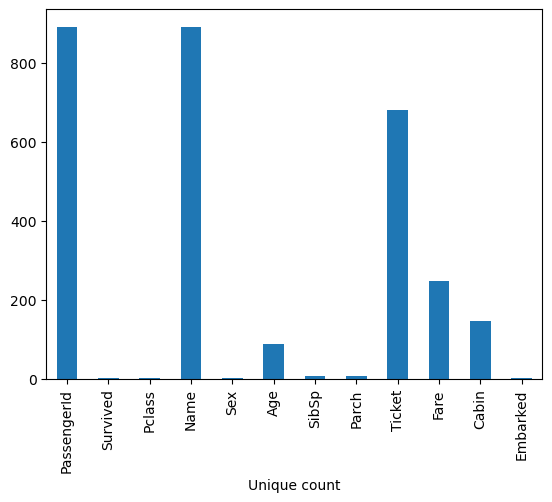

In [146]:
df.nunique().plot(kind='bar')
plt.xlabel('Unique count')
plt.show()

In [147]:
df.size

10692

In [148]:
df.shape

(891, 12)

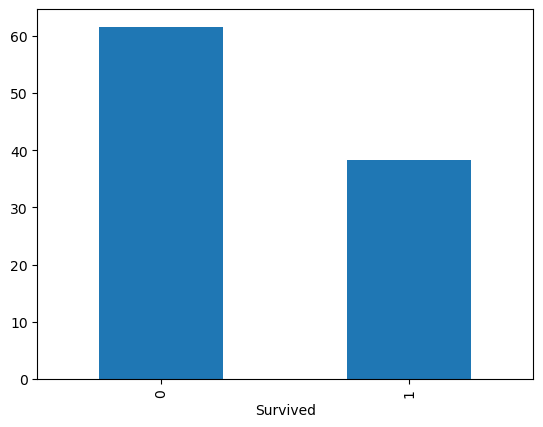

In [149]:
(100*df.Survived.value_counts()/len(df)).plot(kind='bar')
plt.show()

# very low pecentage of surviuval 61 : 39 ratio for survival 

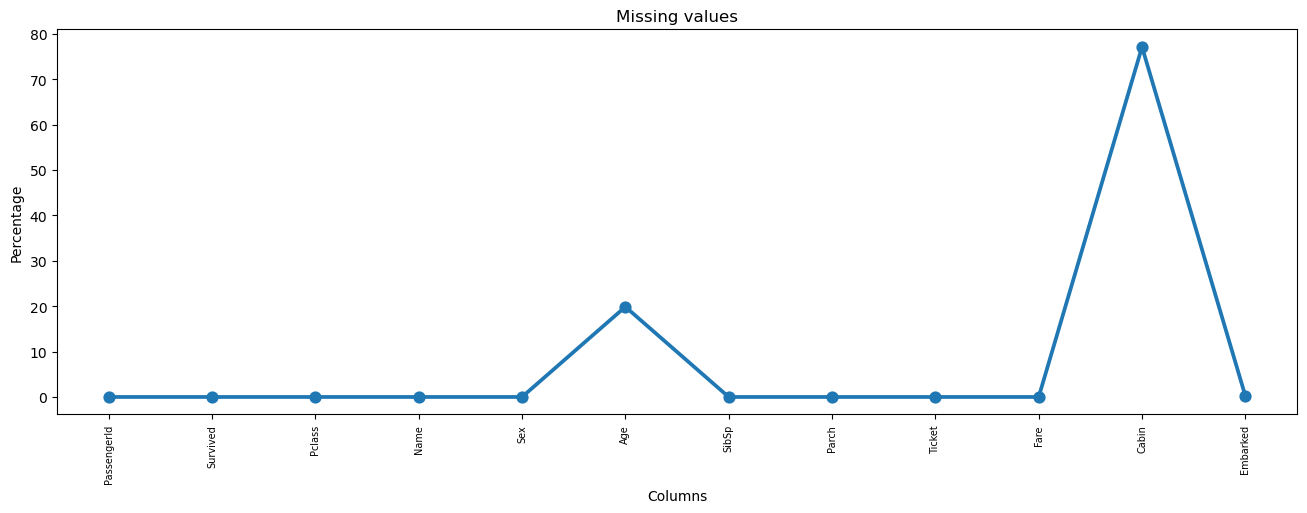

In [150]:
missing =pd.DataFrame((df.isnull().sum()*100)/df.shape[0]).reset_index()
missing.columns = ['Column', 'MissingPercent']

plt.figure(figsize=(16,5))
ax=sns.pointplot(x='Column',y='MissingPercent',data=missing)
plt.xticks(rotation=90,fontsize=7)
plt.xlabel('Columns')
plt.ylabel('Percentage')
plt.title("Missing values")
plt.show()

### Missing Data  - initial Intuition
- In the Age data, it is left skewed data, so we have identified the mean of people whose age between 20 to 30 as per skewness of data and replace the null values with that is Age.
- 
- In the Cabin, there is 687 null values available, there is Pclass 1 value  where 40 null values in Cabin
- In the Cabin, there is 687 null values available, there is Pclass 2 value  where 168 null values in Cabin
- In the Cabin, there is 687 null values available, there is Pclass 3 value  where 479 null values in Cabin

- 2 Values is null in the Embarked.

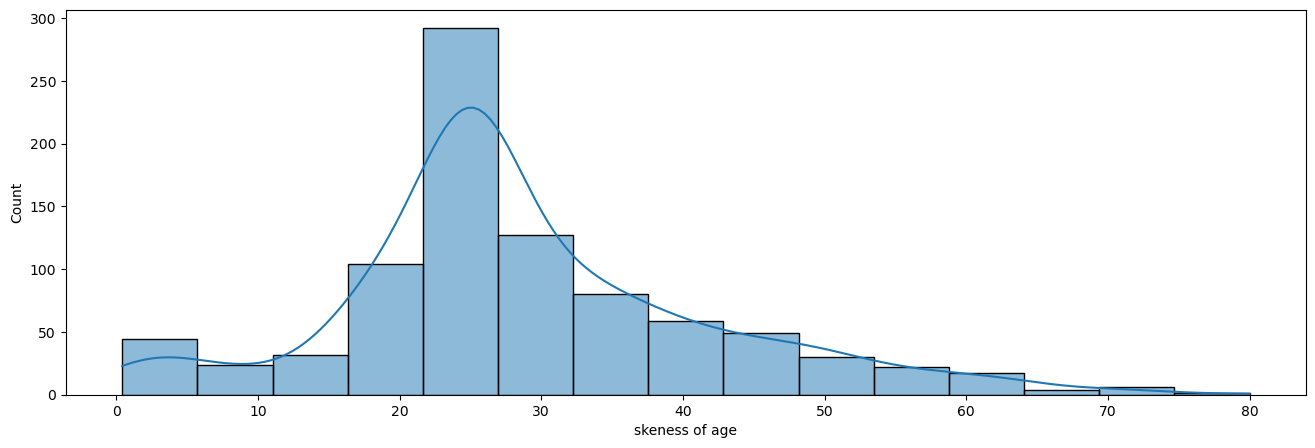

In [273]:
plt.figure(figsize=(16,5))
sns.histplot(df.Age, bins=15,kde=True)
plt.xlabel('skeness of age')
plt.show()

In [152]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [153]:
Age = df[(df['Age'] >= 20) & (df['Age'] <= 30)]
Age.Age.mean()  

25.091836734693878

In [154]:
Age.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,245.000000,245.000000,245.000000,245.000000,245.000000,245.000000,245.000000
mean,432.624490,0.355102,2.424490,25.091837,0.314286,0.228571,27.101665
std,254.982444,0.479524,0.757079,3.134410,0.610026,0.631158,42.826678
min,1.000000,0.000000,1.000000,20.000000,0.000000,0.000000,0.000000
25%,222.000000,0.000000,2.000000,22.000000,0.000000,0.000000,7.895800
50%,404.000000,0.000000,3.000000,25.000000,0.000000,0.000000,10.500000
75%,650.000000,1.000000,3.000000,28.000000,0.000000,0.000000,26.000000
max,890.000000,1.000000,3.000000,30.000000,3.000000,4.000000,263.000000


In [155]:
df.Cabin.isnull().sum()

687

In [310]:
# Convert the 'Cabin' column to string, take the first character (deck letter), and store it in a new 'Deck' column
df['Deck'] = df['Cabin'].astype(str).str[0]

In [308]:
df.groupby(['Pclass','Deck'])['Fare'].agg(Count='count', Max='max', Sum='sum', Min = 'min',Mean = 'mean',std= 'std')   

Count       Max        Sum      Min        Mean         std
Pclass Deck                                                             
1      A        15   81.8583   594.3583   0.0000   39.623887   17.975333
       B        47  512.3292  5334.7709   0.0000  113.505764  109.301500
       C        99  512.3292  8982.8748   0.0000   90.736109   79.267897
       D        29  113.2750  1836.4043  25.9292   63.324286   26.172260
       E        25  134.5000  1393.5042  25.5875   55.740168   30.386910
       T         1   35.5000    35.5000  35.5000   35.500000         NaN
2      D         4   13.7917    52.6667  12.8750   13.166675    0.420829
       E         4   13.0000    46.3500  10.5000   11.587500    1.283469
       F       176   73.5000  3702.8250   0.0000   21.038778   13.598383
3      E         3   12.4750    33.0000   8.0500   11.000000    2.554775
       F       484   69.5500  6627.3701   0.0000   13.692913   11.856758
       G         4   16.7000    54.3250  10.4625   13.581250    3.601222

In [158]:
df[df['Pclass']==1].isnull().sum()

PassengerId     0
Survived        0
Pclass          0
Name            0
Sex             0
Age            30
SibSp           0
Parch           0
Ticket          0
Fare            0
Cabin          40
Embarked        2
Deck            0
dtype: int64

In [159]:
df[df['Pclass']==2].isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             11
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          168
Embarked         0
Deck             0
dtype: int64

In [160]:
df[df['Pclass']==3].isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            136
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          479
Embarked         0
Deck             0
dtype: int64

In [161]:
df.groupby('Deck')[['Fare', 'Pclass']].agg(
    Count_Fare=('Fare', 'count'),
    Max_Fare=('Fare', 'max'),
    Count_Pclass=('Pclass', 'count'),
    Max_Pclass=('Pclass', 'max')
)

,Count_Fare,Max_Fare,Count_Pclass,Max_Pclass
Deck,,,,
A,15,81.8583,15,1
B,47,512.3292,47,1
C,59,263.0000,59,1
D,33,113.2750,33,2
E,32,134.5000,32,3
F,13,39.0000,13,3
G,4,16.7000,4,3
T,1,35.5000,1,1
n,687,512.3292,687,3


In [162]:
df['Deck'] = df['Deck'].replace('n',np.nan)

In [163]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Deck
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,NaN
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,NaN
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,C
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,NaN
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,B
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,NaN
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,C


## Data Cleaning 

on the basis of missing value intuition , we can fill the null values.

-in the Age, we can fill null with the age between (20 to 30 ) mean bcz aforesaid that the data is left skewed.

-in the Cabin value we should fill the null values on the basis of Pclass of passenger and 

In [164]:
# fill the null vales in the age column
df.Age=df['Age'].fillna(Age.Age.mean())

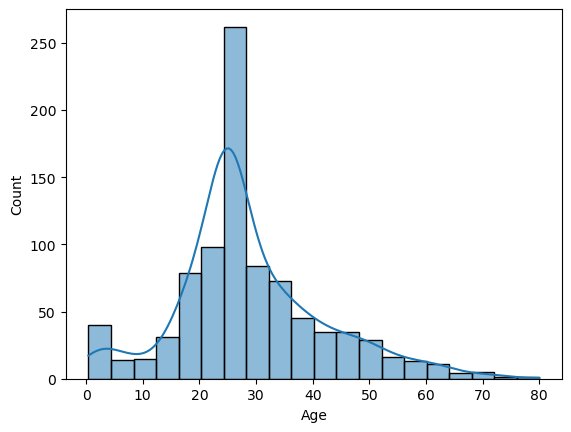

In [165]:
sns.histplot(df['Age'],bins=20,kde=True)
plt.show()

In [311]:
## lets fil the null values in the Cabin 

In [167]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Deck
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,NaN
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,NaN
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,C
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,NaN


In [168]:
# Find most common deck per Pclass
deck_mode_per_class = df.groupby('Pclass')['Deck'].agg(lambda x: x.mode()[0])
print(deck_mode_per_class)

Pclass
1    C
2    F
3    F
Name: Deck, dtype: object


In [169]:
# Fill missing Decks by class
def impute_deck(row):
    if pd.isnull(row['Cabin']):
        return deck_mode_per_class[row['Pclass']]
    else:
        return row['Deck']   


df['Deck']= df.apply(impute_deck,axis=1)


df['Cabin']= df['Deck'] + "000"

In [306]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Deck
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,F000,S,F
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C000,C,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,F000,S,F
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C000,S,C
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,F000,S,F
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,F000,S,F
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,B000,S,B
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,25.091837,1,2,W./C. 6607,23.4500,F000,S,F
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C000,C,C


In [171]:
df.Embarked.mode()

0    S
Name: Embarked, dtype: object

In [172]:
df['Embarked']=df['Embarked'].fillna(df['Embarked'].mode()[0])

In [173]:
df.isnull().sum() # there is no nullvalues in  the data set

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
Deck           0
dtype: int64

## Data Exploration

Univariate analysis

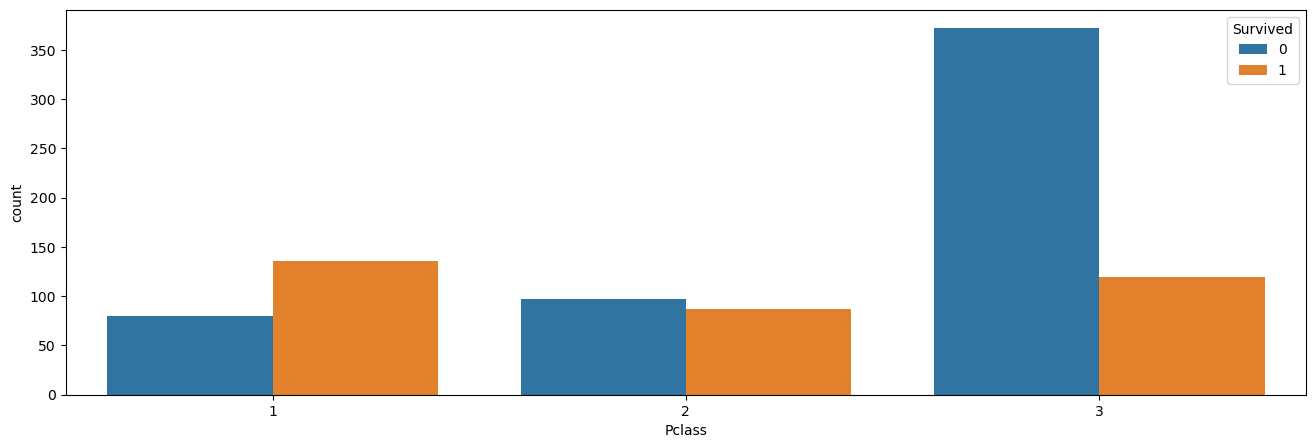

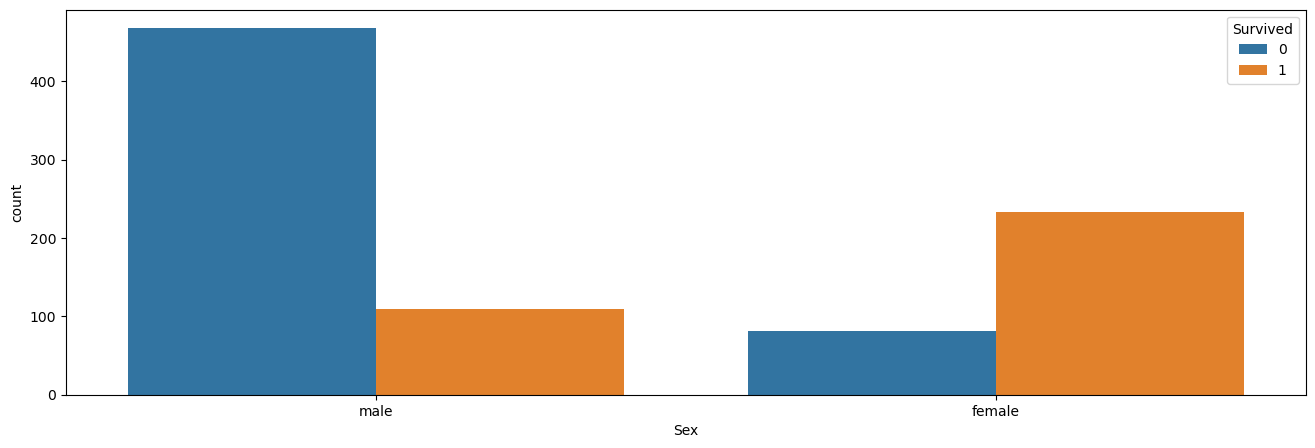

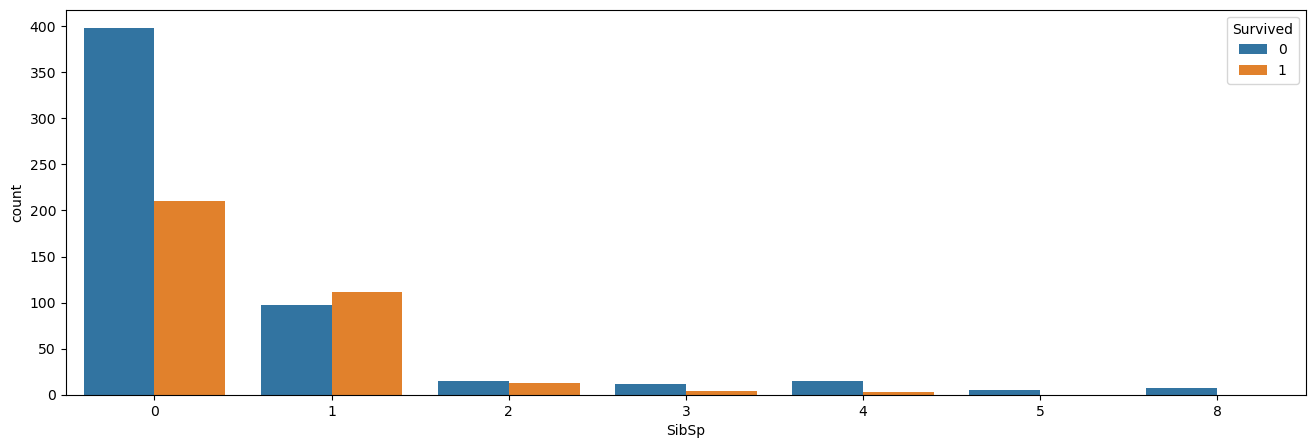

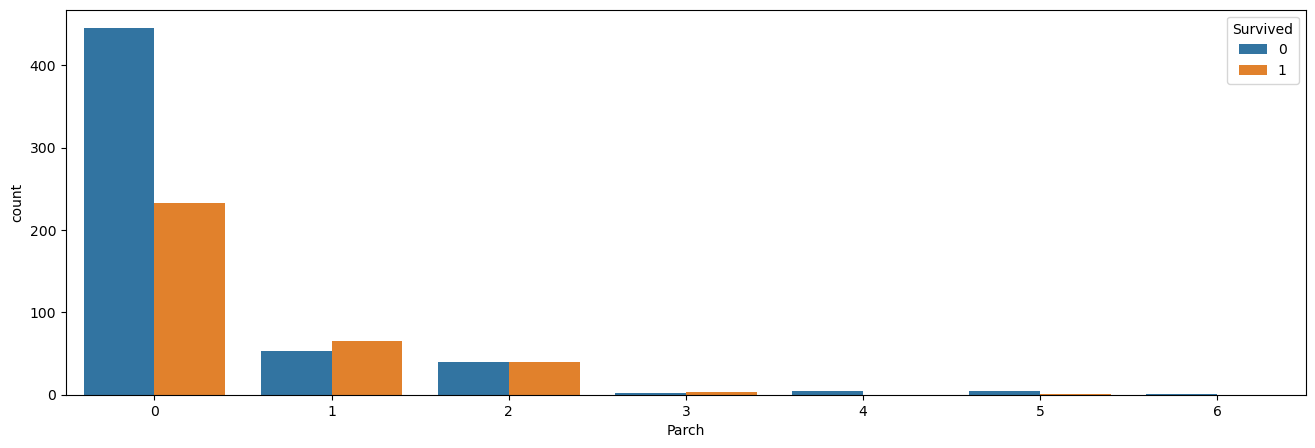

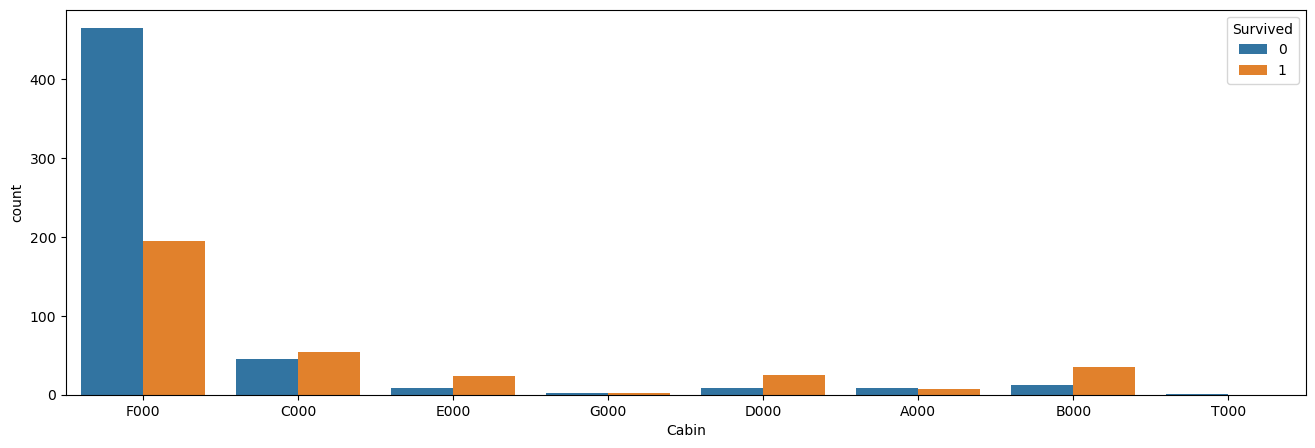

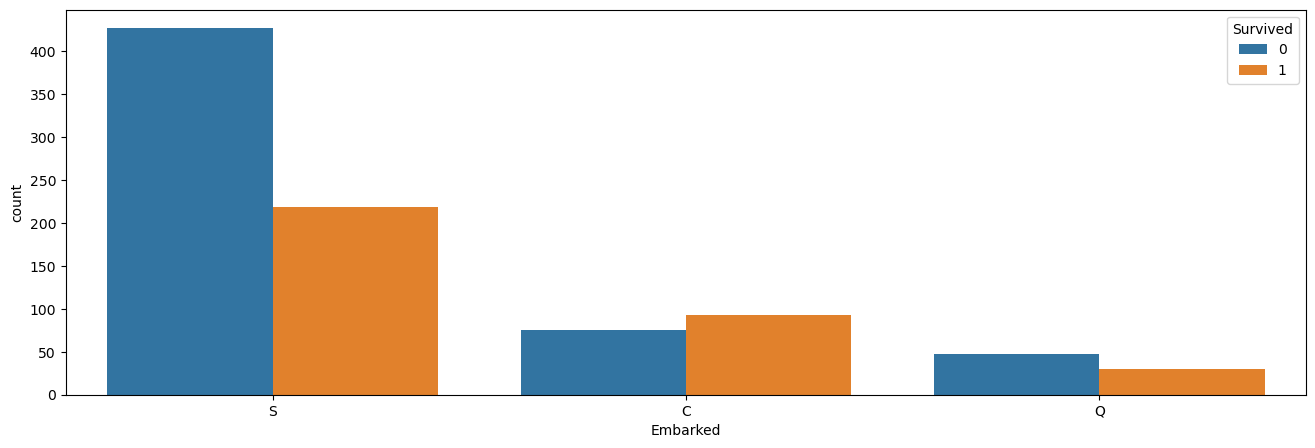

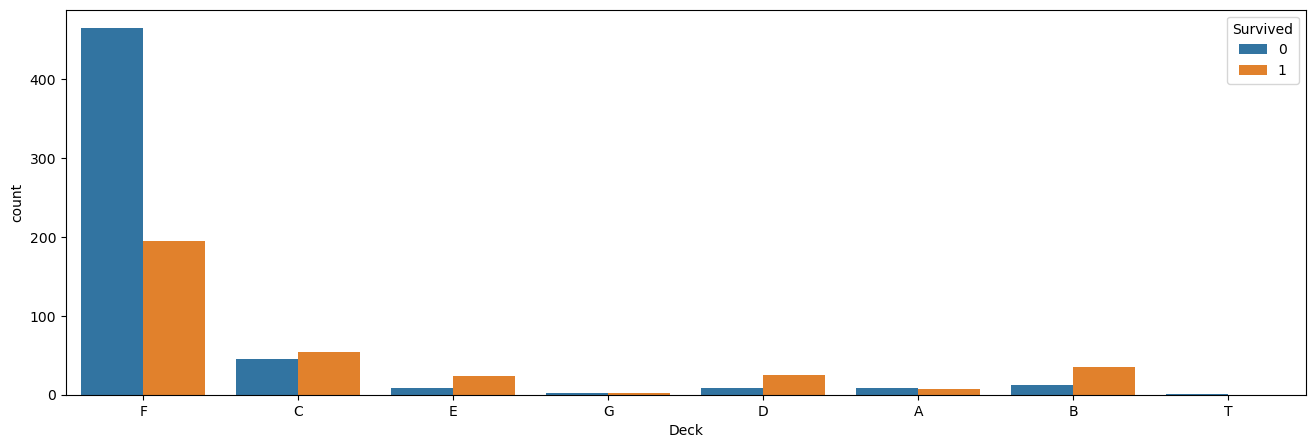

In [174]:
for i , predictor in enumerate(df.drop(columns=['Survived','PassengerId','Name','Age','Ticket','Fare'],axis=1)):
    plt.figure(i,figsize=(16,5))
    sns.countplot(data=df,x= predictor,hue='Survived')
    plt.show()

## Intuition from Univariate Analysis — Figure by Figure on Categorical Features

Pclass: The survival rate is high in 1st class and low in 3rd class.

Sex: The survival rate (percentage) is higher for females, but in absolute numbers, more males survived because there were more males onboard.

SibSp: Passengers with fewer or no siblings/spouses had a higher survival rate because they had less dependency.

Parch: Passengers with fewer or no parents/children had a higher survival rate because they had less dependency.

Cabin / Deck: Higher survival rates were seen in cabins on decks B, C, and D, but many survivors were also from F deck; overall, passengers who had cabin assignments survived more.

Embarked: More passengers who boarded at Southampton survived in absolute numbers (because most passengers boarded there), but the survival rate was highest among passengers who boarded at Cherbourg.



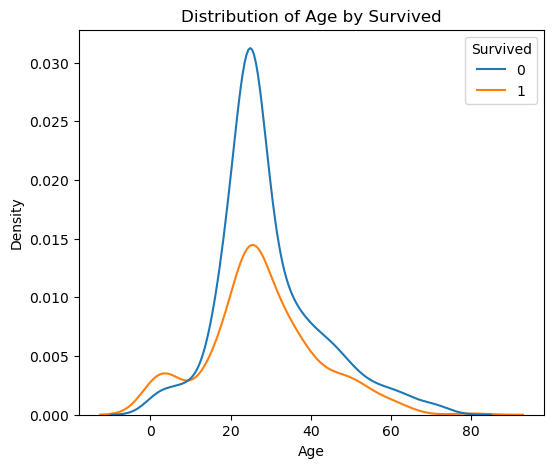

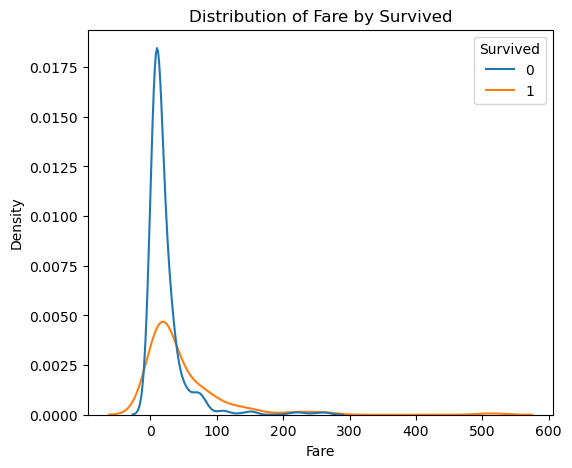

In [175]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get a list of colors outside the loop
colors = sns.color_palette('tab10')  # or 'Set2', 'pastel', 'husl', etc.
color_idx = 0

for col in df.columns:
    if df[col].dtype == 'int64' or df[col].dtype == 'float64':
        if col in ['PassengerId', 'Survived', 'Pclass', 'SibSp', 'Parch']:
            continue

        plt.figure(figsize=(6, 5))
        sns.kdeplot(data=df, x=col, hue='Survived',color=colors[color_idx % len(colors)])
        plt.title(f'Distribution of {col} by Survived')
        plt.show()

        color_idx += 1  # move to next color
        

## BiVariate and Univariate analysis


In [176]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Deck
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,F000,S,F
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C000,C,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,F000,S,F
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C000,S,C
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,F000,S,F


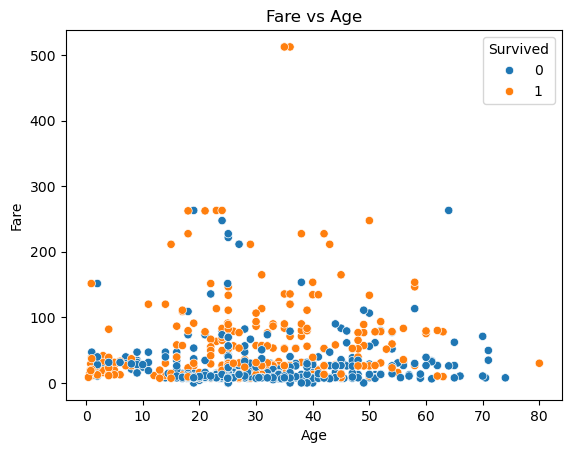

           Age      Fare
Age   1.000000  0.104769
Fare  0.104769  1.000000


In [177]:
sns.scatterplot(x='Age', y='Fare', data=df,hue='Survived')
plt.title('Fare vs Age')
plt.show()

# Correlation
print(df[['Age','Fare']].corr())


### Interpretation:
0.1048 means there’s only a very weak positive relationship between a passenger’s age and the fare they paid.

In plain words: older passengers tended to pay slightly more, but the effect is minor and probably not strongly predictive.

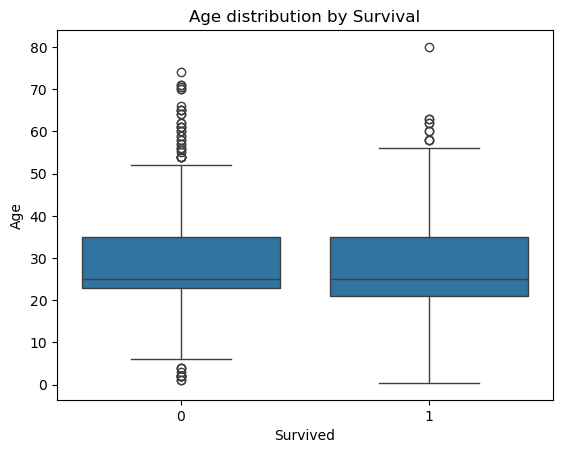

In [178]:
sns.boxplot(x='Survived', y='Age', data=df)
plt.title('Age distribution by Survival')
plt.show()

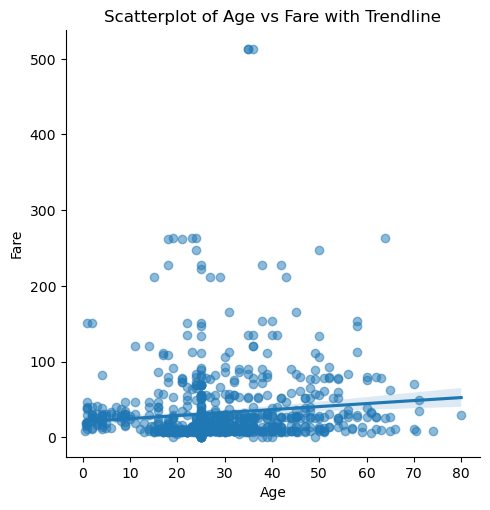

In [179]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.lmplot(x='Age', y='Fare', data=df, scatter_kws={'alpha':0.5})
plt.title('Scatterplot of Age vs Fare with Trendline')
plt.show()


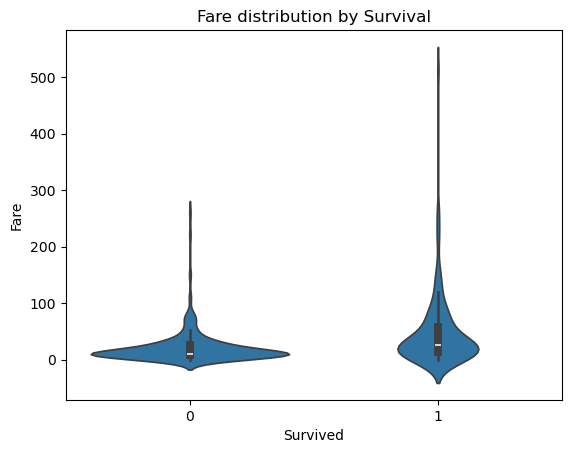

In [180]:
sns.violinplot(x='Survived', y='Fare', data=df)
plt.title('Fare distribution by Survival')
plt.show()


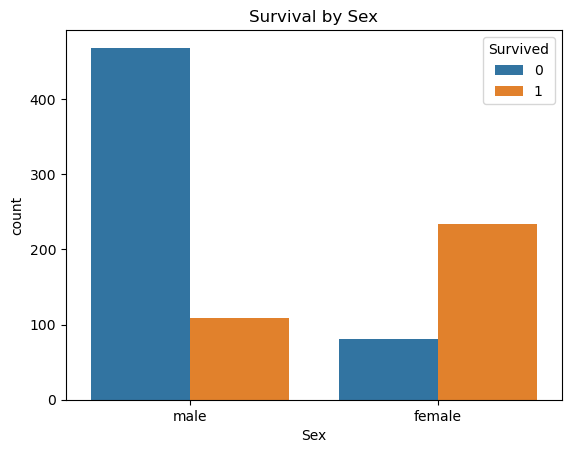

In [181]:
sns.countplot(x='Sex', hue='Survived', data=df)
plt.title('Survival by Sex')
plt.show()


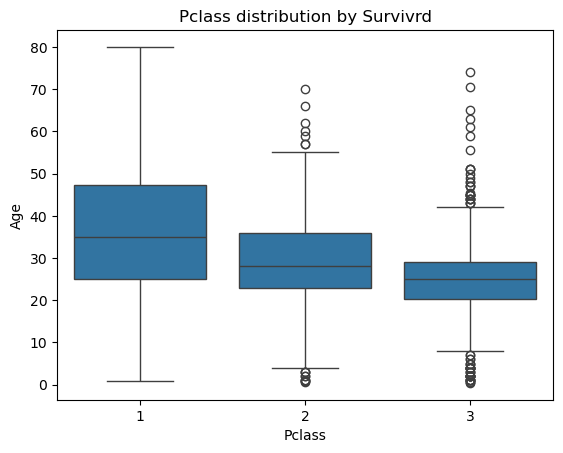

In [182]:
sns.boxplot(x='Pclass', y='Age', data=df)
plt.title('Pclass distribution by Survivrd')
plt.show()

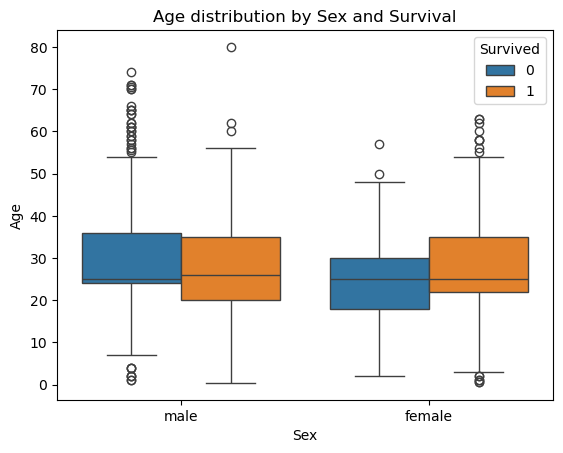

In [183]:
sns.boxplot(x='Sex', y='Age', hue='Survived', data=df)
plt.title('Age distribution by Sex and Survival')
plt.show()


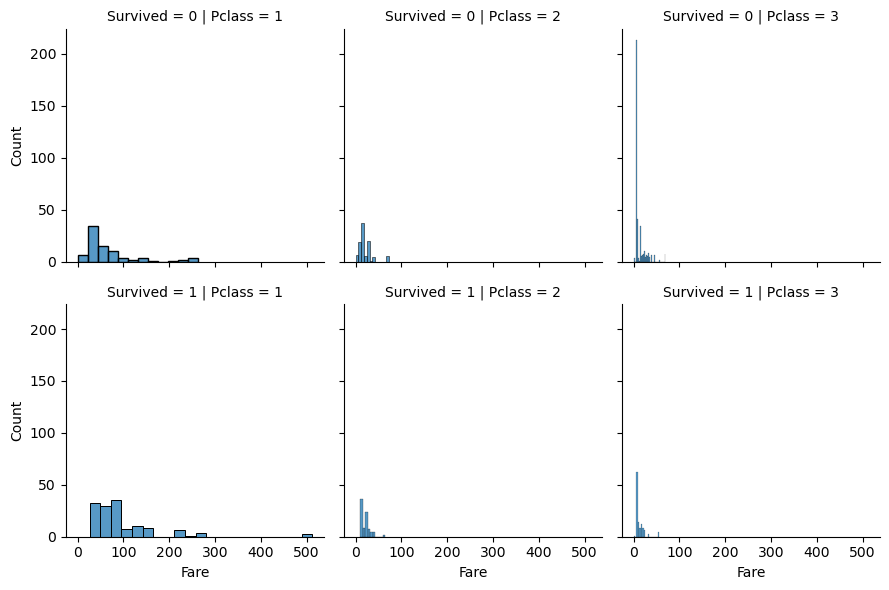

In [188]:
# Fare distribution by class and survival
g = sns.FacetGrid(df, col='Pclass', row='Survived')
g.map(sns.histplot, 'Fare')
plt.show()


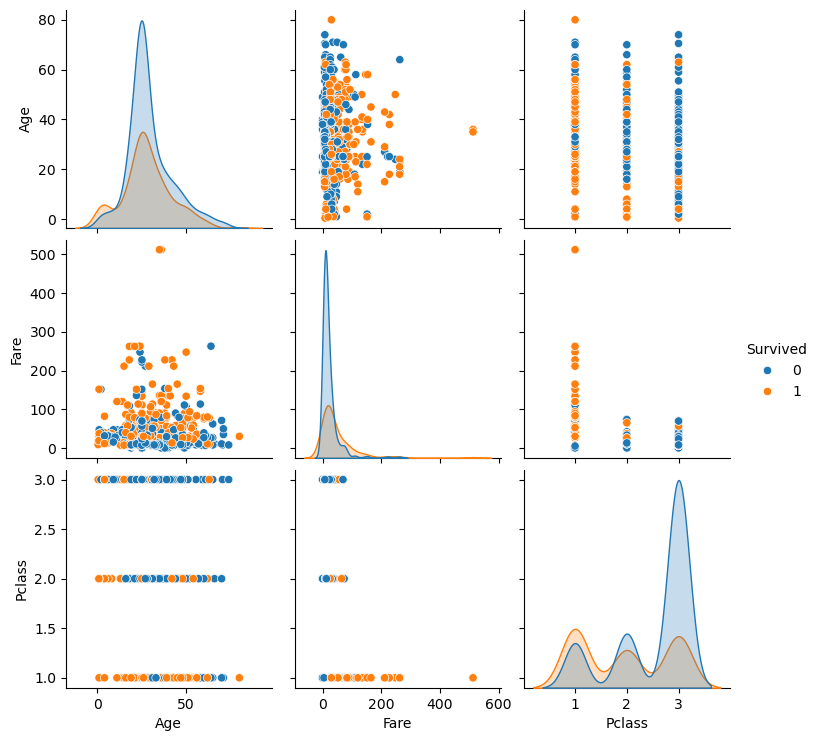

In [189]:
# Pairplot with hue on survival
sns.pairplot(df[['Age', 'Fare', 'Pclass', 'Survived']].dropna(), hue='Survived')
plt.show()


In [184]:
df_dummies=pd.get_dummies(df.drop(columns=['Ticket','Name','PassengerId','Deck','Cabin'],axis=1),dtype=int) # get_dummies is method to convert the categorical value into int

In [185]:
df_dummies.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,1,38.0,1,0,71.2833,1,0,1,0,0
2,1,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,1,35.0,1,0,53.1000,1,0,0,0,1
4,0,3,35.0,0,0,8.0500,0,1,0,0,1


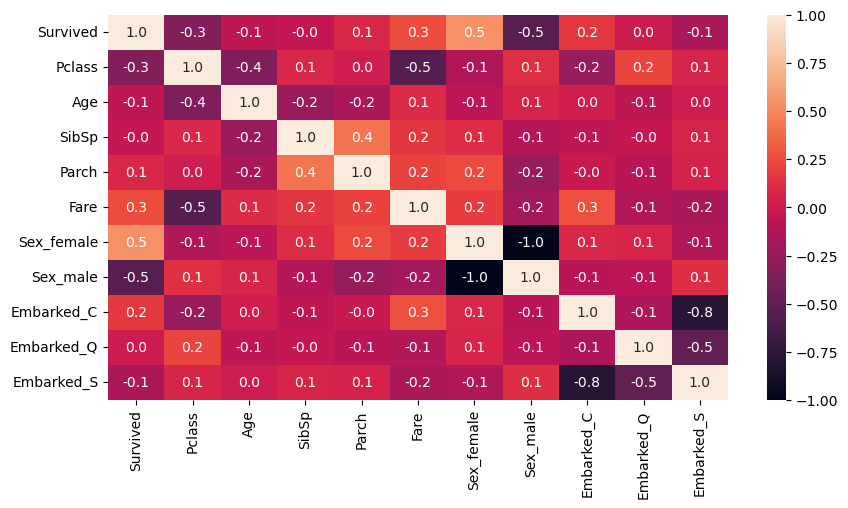

In [186]:
plt.figure(figsize=(10,5))
sns.heatmap(df_dummies.corr(),annot=True,fmt=".1f")
plt.show()

In [ ]:
#TEST TRAIN SCALING THE DATA

In [190]:
df_sc=df[['Survived','Age','Fare']]

In [192]:
df_sc.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [193]:
#test and train the data
from sklearn.model_selection import train_test_split

In [196]:
x_train,x_test,y_train,y_test=train_test_split(df_sc.drop(columns='Survived',axis=1),df['Survived'],test_size=.3,random_state=0)

In [206]:
x_train.shape,x_test.shape,y_train.shape,y_train.shape

((623, 2), (268, 2), (623,), (623,))

In [207]:
#scaled the age and fare on scale 
from sklearn.preprocessing import StandardScaler

In [208]:
scaler=StandardScaler()

In [210]:
x_train_scaled=scaler.fit_transform(x_train)
x_test_scaled=scaler.transform(x_test)

In [213]:
x_train_scaled=pd.DataFrame(x_train_scaled,columns=x_train.columns)
x_test_scaled=pd.DataFrame(x_test_scaled,columns=x_test.columns)

In [217]:
x_train_scaled.head(),x_test_scaled.head()


(        Age      Fare
 0  1.674835 -0.122530
 1  1.522726  0.918124
 2 -2.127894  0.299503
 3  1.902999  0.929702
 4 -0.295599 -0.373297,
         Age      Fare
 0 -0.295599 -0.373297
 1 -0.295599 -0.516566
 2 -1.671567 -0.069128
 3 -0.295599  2.365514
 4  0.001634 -0.356965)

In [220]:
np.round(x_train_scaled.describe(),1)

,Age,Fare
count,623.0,623.0
mean,0.0,0.0
std,1.0,1.0
min,-2.2,-0.7
25%,-0.5,-0.5
50%,-0.3,-0.4
75%,0.5,-0.0
max,3.9,10.0


# Effect of scaling

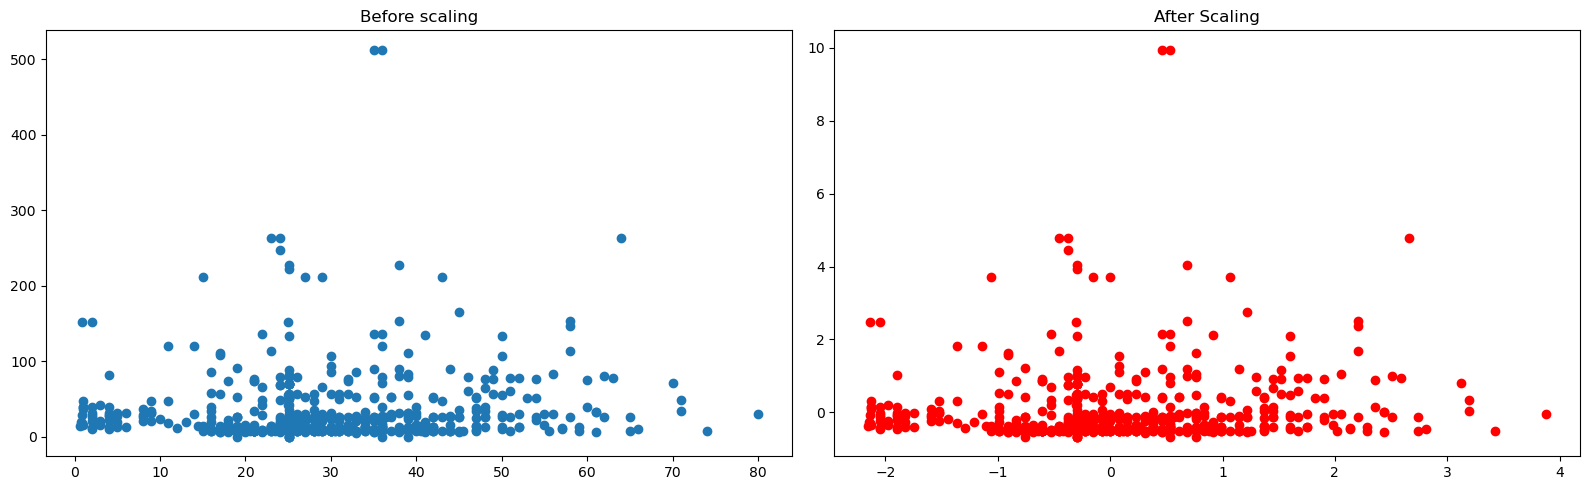

In [230]:
#plot the subplotb before scale and after scale
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(16,5))
ax1.scatter(x_train['Age'],x_train['Fare'])
ax1.set_title('Before scaling')
ax2.scatter(x_train_scaled['Age'],x_train_scaled['Fare'],color='red')
plt.title('After Scaling')
plt.tight_layout()
plt.show()

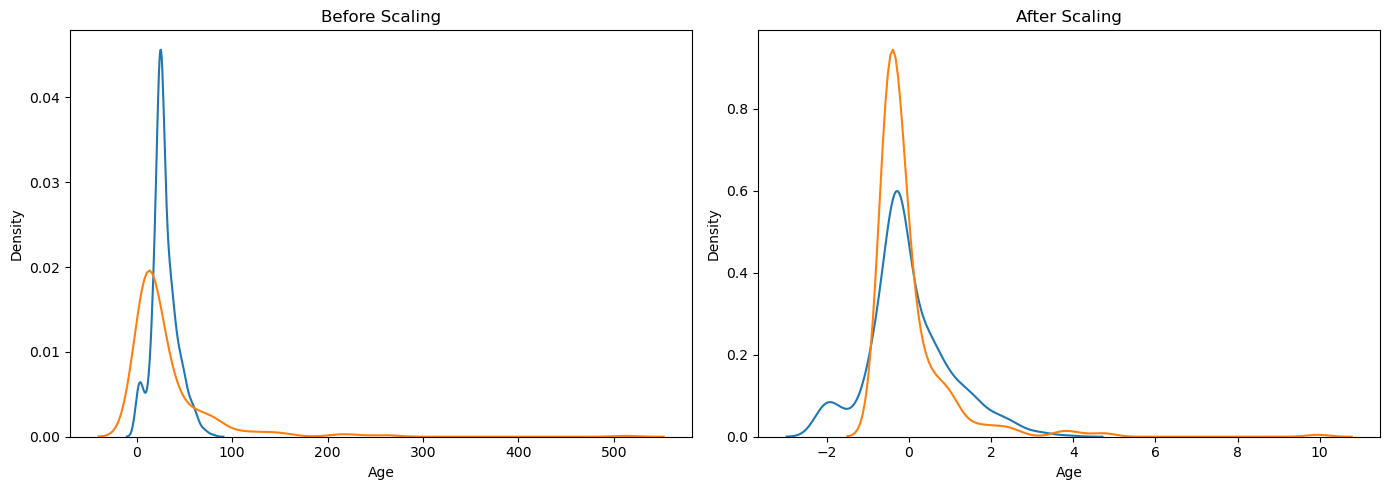

In [305]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Create the subplot figure (1 row, 2 columns)
plt.figure(figsize=(14, 5))

# Before scaling
plt.subplot(1, 2, 1)
sns.kdeplot(x_train['Age'])
sns.kdeplot(x_train['Fare'])
plt.title('Before Scaling')

# After scaling
plt.subplot(1, 2, 2)
sns.kdeplot(x_train_scaled['Age'])
sns.kdeplot(x_train_scaled['Fare'])
plt.title('After Scaling')

plt.tight_layout()
plt.show()

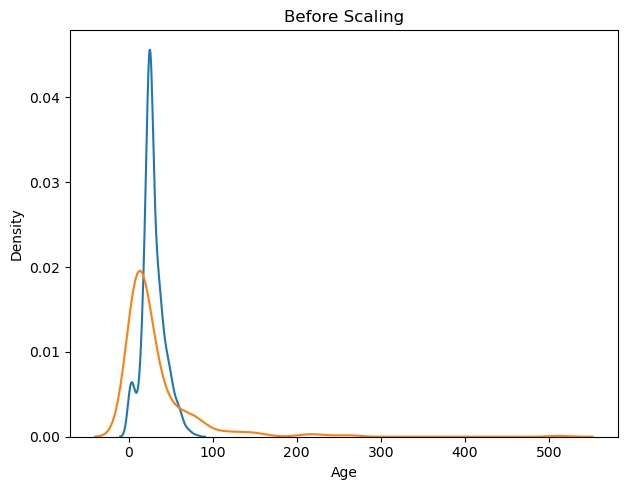

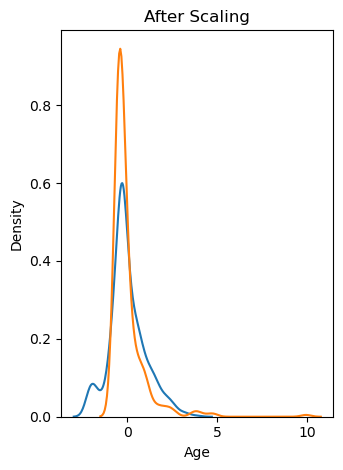

In [301]:
plt.figure(figsize=(12,5))

# BEFORE SCALING
plt.subplot(1,2,1)
sns.kdeplot(x_train['Age'])
sns.kdeplot(x_train['Fare'])
plt.title('Before Scaling')
plt.tight_layout()
plt.show()

# AFTER SCALING 
plt.subplot(1,2,2)
sns.kdeplot(x_train_scaled['Age'])
sns.kdeplot(x_train_scaled['Fare'])
plt.title('After Scaling')
plt.tight_layout()
plt.show()

## COMPARISON OF DISTRIBUTION


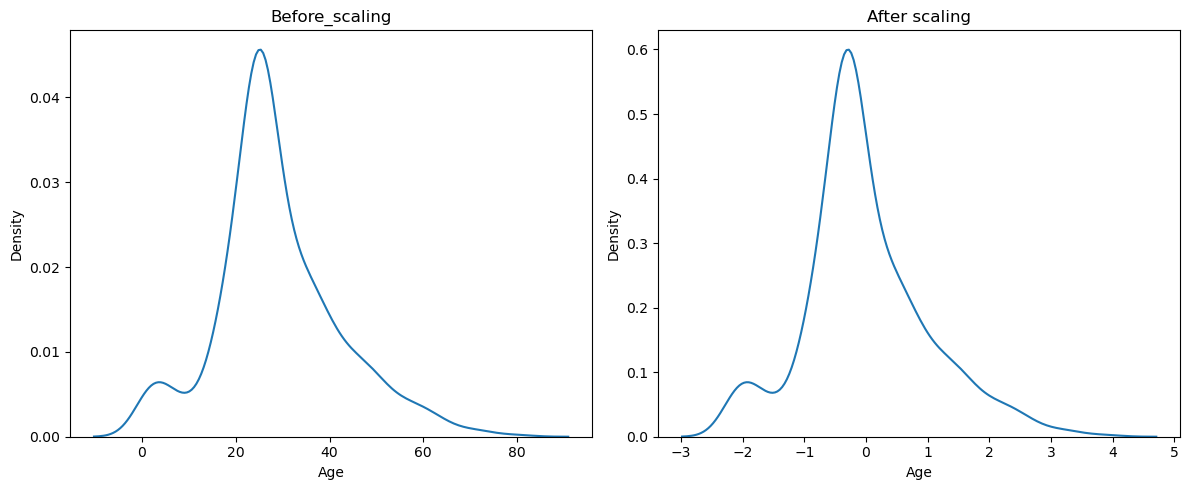

In [264]:
# the distribution should be betweem age and estimated salry before scaling and after scaling 
# with the help of subplot

fig,(ax1,ax2)=plt.subplots(1,2,figsize=(12,5))

#befroe and after scaling of age 
sns.kdeplot(x_train.Age,ax=ax1)
ax1.set_title("Before_scaling")
sns.kdeplot(x_train_scaled.Age,ax=ax2)
ax2.set_title('After scaling')
#plt.legend()
plt.tight_layout()
plt.show()

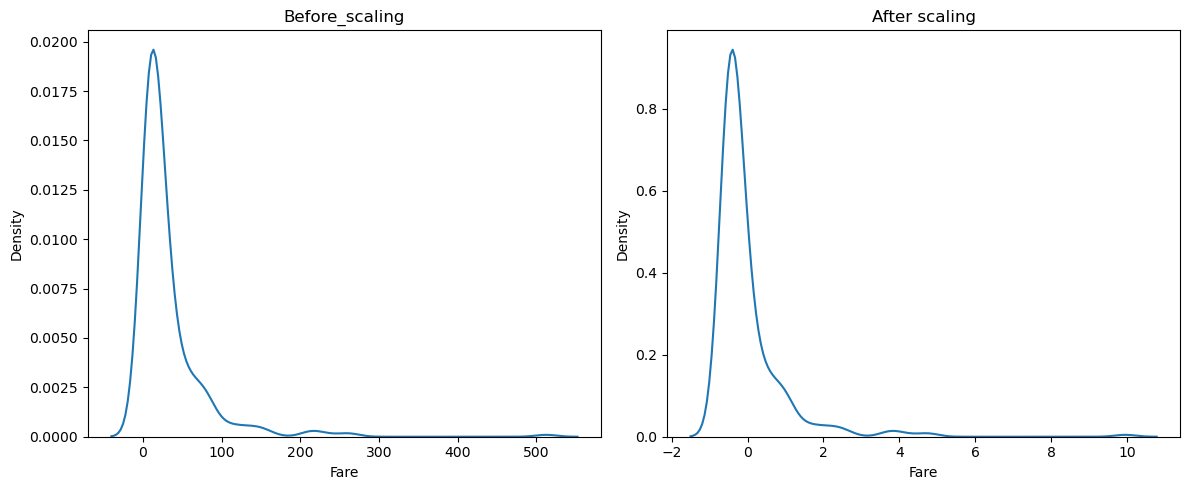

In [265]:
## COMPARISON OF DISTRIBUTION

# the distribution should be betweem age and fare before scaling and after scaling 
# with the help of subplot

fig,(ax1,ax2)=plt.subplots(1,2,figsize=(12,5))

#befroe and after scaling of age 
sns.kdeplot(x_train.Fare,ax=ax1)
ax1.set_title("Before_scaling")
sns.kdeplot(x_train_scaled.Fare,ax=ax2)
ax2.set_title('After scaling')
#plt.legend()
plt.tight_layout()
plt.show()